In [ ]:
import tensorflow as tf

In [ ]:

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:

%cd /gdrive/MyDrive/datasets/

/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets


In [ ]:
# load all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [ ]:
# focused countries

COUNTRIES = """Argentina
Bolivia
Brazil
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
El Salvador
French Guiana
Guadeloupe
Guatemala
Haiti
Honduras
Martinique
Mexico
Nicaragua
Panama
Paraguay
Peru
Puerto Rico
Saint Barthélemy
Saint Martin
Uruguay
Venezuela
Brunei
Cambodia
Timor-Leste
Indonesia
Laos
Malaysia
Burma (Myanmar)
Philippines
Singapore
Thailand
Vietnam""".split("\n")

In [ ]:
def readCsvFile(filepath):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """

    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(" ", "_")

    df.drop(df.columns[-1], inplace=True, axis = 1)

    return df

In [ ]:
%pwd

'/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets'

In [ ]:
raw_us_aid = readCsvFile('us_foreign_aid_complete.csv')

In [ ]:
raw_us_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,U.S. Agency for International Development,20,ASIA,Bureau for Asia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,1,Education,112,Basic Education,11220,Primary education,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Developm...",1,U.S. Agency for International Development,USAID,1,Economic,4,Technical Assistance,13,Technical Cooperation - Other,144477,76,Office Of Social Sector Dev. - Education,Office Of Social Sector Dev. - Education,306-002,NaN,NaN,NaN,2,Obligations,2006,01MAR2006,37760,47793,30831,110,1
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,U.S. Agency for International Development,20,ASIA,Bureau for Asia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,1,Education,112,Basic Education,11220,Primary education,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Developm...",1,U.S. Agency for International Development,USAID,1,Economic,4,Technical Assistance,13,Technical Cooperation - Other,144477,76,Office Of Social Sector Dev. - Education,Office Of Social Sector Dev. - Education,306-002,NaN,NaN,NaN,3,Disbursements,2006,01MAR2006,983,1244,30831,110,1


In [ ]:
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [ ]:
raw_us_aid['fiscal_year'] = raw_us_aid['fiscal_year'].astype(int)

In [ ]:
# consider latest government
latest_foreign_aid = raw_us_aid[(raw_us_aid.fiscal_year>=2021) & (raw_us_aid.fiscal_year<2022)]\
                  .query("country_name == @COUNTRIES")

In [ ]:
latest_foreign_aid.groupby(['country_code']).agg({'activity_description':'nunique'}).reset_index()

,country_code,activity_description
0,ARG,101
1,BOL,32
2,BRA,150
3,CHL,16
4,COL,1972
5,CRI,1051
6,CUB,18
7,DOM,302
8,ECU,452
9,GTM,2017


In [ ]:
latest_foreign_aid[latest_foreign_aid.duplicated(['country_code', 'activity_description'])].head()

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id
107781,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,7,Multilateral,12,Multilateral - United Nations,4000455,United Nations Office on Drugs and Crime,3,Governance,151,Government and Civil Society,15130,Legal and judicial development,2,"Democracy, Human Rights, and Governance",7,Rule of Law and Human Rights,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,3,Project-Type,8,Project-type interventions - not Investment Re...,345875,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,SINLEC21LA3353,NaN,NaN,2021-09-30,3,Disbursements,2021,30SEP2021,600000,589998,134457,110,1
107783,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,8,Enterprises,19,Enterprises - United States,3990008,Enterprise - United States Other,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,312736,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,20730110299,NaN,NaN,2020-12-02,2,Obligations,2021,02DEC2020,13440,13216,101318,110,1
107784,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,8,Enterprises,19,Enterprises - United States,3990008,Enterprise - United States Other,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,312739,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,20730110299,NaN,NaN,2021-05-04,2,Obligations,2021,04MAY2021,-900,-885,101321,110,1
107785,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,8,Enterprises,19,Enterprises - United States,3990008,Enterprise - United States Other,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Ad

In [ ]:
latest_foreign_aid['region_name'].value_counts()

Western Hemisphere       53778
East Asia and Oceania    17930
Name: region_name, dtype: int64

# Text analytics
## Clustering activity description using topic modelling
## Approach 2: contextulized topic modeling

In [ ]:
%%capture
!pip install contextualized_topic_models
!pip install sentence-transformers

In [ ]:
from contextualized_topic_models.models.ctm import ZeroShotTM, CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk
import torch
import random
import numpy as np

In [ ]:

def fix_seeds():
  torch.manual_seed(10)
  torch.cuda.manual_seed(10)
  np.random.seed(10)
  random.seed(10)
  torch.backends.cudnn.enabled = False
  torch.backends.cudnn.deterministic = True

In [ ]:
from nltk.corpus import stopwords as stop_words
nltk.download('stopwords')
stopwords = list(set(stop_words.words('english')))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
latest_foreign_aid['activity_description'] = latest_foreign_aid['activity_description'].astype(str)

In [ ]:
activity_df = latest_foreign_aid.groupby("country_code")['activity_description'].apply(' '.join).reset_index()

In [ ]:
activity_df.head()

,country_code,activity_description
0,ARG,"U.S. Department of State: Bureau of Democracy,..."
1,BOL,USAID redacted this field in accordance with t...
2,BRA,USAID redacted this field in accordance with t...
3,CHL,Natural Hazard Mitigation Global Technical Ass...
4,COL,USAID redacted this field in accordance with t...


In [ ]:
activity_df.shape

(30, 2)

In [ ]:

activity_df.activity_description.apply(lambda x:len(x))

0      216460
1       36221
2      364251
3       35149
4     2473130
5     1250301
6       53761
7      639143
8      832511
9     2493855
10    1787331
11     789080
12    1114818
13     607652
14     320472
15    1752786
16     357422
17     123541
18     199043
19     918896
20    1531719
21     984048
22     423214
23       1077
24    1522151
25     589827
26     181767
27      10148
28     184925
29     888647
Name: activity_description, dtype: int64

In [ ]:
# get text
activities = activity_df['activity_description'].tolist()

In [ ]:
uniq_activities = set(activities)

In [ ]:
documents = list(uniq_activities)


In [ ]:

len(documents)

30

In [ ]:
documents[1]

'This project brings together respected Nicaraguan and international institutions and experts to support democratic political processes by strengthening democratic leadership of youth. The project supports the development of a core group of young political leaders that fosters a more transparent, participatory and democratic society. This project brings together respected Nicaraguan and international institutions and experts to support democratic political processes by strengthening democratic leadership of youth. The project supports the development of a core group of young political leaders that fosters a more transparent, participatory and democratic society. USAID redacted this field in accordance with the exceptions outlined in the Foreign Aid Transparency and Accountability Act of 2016. USAID redacted this field in accordance with the exceptions outlined in the Foreign Aid Transparency and Accountability Act of 2016. USAID redacted this field in accordance with the exceptions out

In [ ]:
documents[0]

"Health: PAHO Umbrella Grant 2016-2021 Housed in a 19th-century villa, the Blanes Municipal Museum displays Uruguayan art from the nation's founding in the 19th century to the present day. This project includes the conservation of the building's masonry facades. Housed in a 19th-century villa, the Blanes Municipal Museum displays Uruguayan art from the nation's founding in the 19th century to the present day. This project includes the conservation of the building's masonry facades. The eastern seaboard of Uruguay includes a chain of 5 coastal lagoons, supporting globally important populations of migratory shorebirds that use the surrounding grasslands, wetlands and sandy areas, as well as the lagoon shores, as wintering areas. This region, covering 2,471,000 acres, is under pressure by threats such as agriculture, intensive livestock ranching, urbanization and recreational activities such as uncontrolled tourism. Partners will secure long-term shorebird conservation by developing and e

In [ ]:

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)


In [ ]:
preprocessed_documents, unpreprocessed_corpus, vocab, _ = sp.preprocess()

In [ ]:
tp = TopicModelDataPreparation("paraphrase-distilroberta-base-v2")

In [ ]:
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from contextualized_topic_models.evaluation.measures import CoherenceNPMI, InvertedRBO
corpus = [d.split() for d in preprocessed_documents]

num_topics = [5, 10, 15, 20]
num_runs = 5

best_topic_coherence = -999
best_num_topics = 0
for n_components in num_topics:
  for i in range(num_runs):
    print("num topics:", n_components, "/ num run:", i)
    ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768,
                     n_components=n_components, num_epochs=50)
    ctm.fit(training_dataset) # run the model
    coh = CoherenceNPMI(ctm.get_topic_lists(10), corpus)
    coh_score = coh.score()
    print("coherence score:", coh_score)
    if best_topic_coherence < coh_score:
      best_topic_coherence = coh_score
      best_num_topics = n_components
    print("current best coherence", best_topic_coherence, "/ best num topics", best_num_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num topics: 5 / num run: 0


0it [00:00, ?it/s]

ZeroDivisionError: ignored

In [ ]:
fix_seeds() # uncomment if you don't want to fix the random seeds

num_topics = 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=num_topics, num_epochs=50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AssertionError: ignored

In [ ]:
ctm.fit(training_dataset) # run the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:00, ?it/s]

ZeroDivisionError: ignored

In [ ]:
ctm.get_topic_lists(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:16, ?it/s]
0it [00:03, ?it/s]


TypeError: ignored

In [ ]:
topics_predictions = ctm.training_doc_topic_distributions # get all the topic predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
np.sum(topics_predictions[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [ ]:
np.sum(topics_predictions, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 0.99999994,
       1.0000001 , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999994,
       1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.0000001 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.0000001 , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
len(topics_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


208

In [ ]:
len(training_dataset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


208

# Topic clustering

In [ ]:
proba_dist = pd.read_pickle("results/proba_dist_topic_modelling.pkl")

In [ ]:
proba_dist.head(2)

,0,1,2,3,4,country_code
0,0.018903,0.290308,0.197490,0.285736,0.207564,AFG
1,0.008665,0.054887,0.394361,0.273654,0.268434,AGO


In [ ]:
# # create dataframe from topic distribution
# proba_dist = pd.DataFrame(topics_predictions)
# proba_dist['country_code'] = activity_df['country_code']

In [ ]:
%pwd

'/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets'

In [ ]:
# proba_dist.to_pickle("results/proba_dist_topic_modelling.pkl")

In [ ]:
activity_df.head(2)

,country_code,activity_description
0,ARG,"U.S. Department of State: Bureau of Democracy,..."
1,BOL,USAID redacted this field in accordance with t...


In [ ]:
latest_foreign_aid.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,aid_type_id,aid_type_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_budget_amount,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,submission_activity_id,finance_type,dac_flow_id
107743,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,59,DRL,"Democracy, Human Rights, and Labor",8,Enterprises,19,Enterprises - United States,3990208,Enterprise - United States Redacted,3,Governance,151,Government and Civil Society,15150,Democratic participation and civil society,2,"Democracy, Human Rights, and Governance",10,Civil Society,19x1121,"Department of State, Democracy Fund",2,Department of State,STATE,1,Economic,3,Project-Type,8,Project-type interventions - not Investment Re...,235938,105,"Bureau of Democracy, Human Rights and Labor - ...","U.S. Department of State: Bureau of Democracy,...",SLMAQM17GR1022,NaN,NaN,2021-01-22,2,Obligations,2021,22JAN2021,-33085,-32534,24520,110,1
107774,32,ARG,Argentina,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,Department of State,62,INL,International Narcotics and Law Enforcement Af...,1,Government,1,Government - United States,1000004,U.S. Government - Department of State,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,8,Program Support,41,Direct Administrative Costs,11x1022,International Narcotics Control and Law Enforc...,2,Department of State,STATE,1,Economic,6,Administrative Costs,17,Administrative costs not included elsewhere,312737,105,Bureau of International Narcotics and Law Enfo...,U.S. Department of State: Bureau of Internatio...,20730110299,NaN,NaN,2021-02-03,3,Disbursements,2021,03FEB2021,11083,10898,101319,110,1


In [ ]:
latest_foreign_aid['managing_agency_name'].unique()

array(['Department of State', 'Department of the Treasury',
       'Department of Agriculture', 'Department of the Interior',
       'Department of Labor', 'Department of Energy',
       'Trade and Development Agency', 'Inter-American Foundation',
       'U.S. Agency for International Development',
       'Department of Health and Human Services', 'Peace Corps',
       'Department of Justice', 'Millennium Challenge Corporation',
       'Department of Defense', 'Department of Transportation'],
      dtype=object)

In [ ]:
latest_foreign_aid.groupby(['country_code', 'managing_agency_name',
                            'transaction_type_name']).agg({'constant_dollar_amount':'sum'}).reset_index()

,country_code,managing_agency_name,transaction_type_name,constant_dollar_amount
0,ARG,Department of Agriculture,Obligations,21633
1,ARG,Department of Energy,Disbursements,95943
2,ARG,Department of Energy,Obligations,73750
3,ARG,Department of Labor,Disbursements,1455976
4,ARG,Department of Labor,Obligations,294999
...,...,...,...,...
419,VNM,Peace Corps,Obligations,1210563
420,VNM,Trade and Development Agency,Disbursements,755983
421,VNM,Trade and Development Agency,Obligations,865604
422,VNM,U.S. Agency for International Development,Disbursements,105819645


## KMeans

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import silhouette_visualizer, SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# filter for only focused countries
proba_dist = proba_dist[proba_dist.country_code.isin(latest_foreign_aid.country_code)]

In [ ]:
# split data
X = proba_dist.iloc[:,0:-1]

In [ ]:
X.head(2)

,0,1,2,3,4
6,0.022687,0.116142,0.332630,0.246727,0.281814
21,0.030913,0.382528,0.176755,0.219261,0.190543


In [ ]:

# fill na (since value not available, no Aid was provided for that country that year)
X.fillna(value=0, inplace=True)


In [ ]:
scaler = StandardScaler()


In [ ]:

scaled_x = scaler.fit_transform(X)


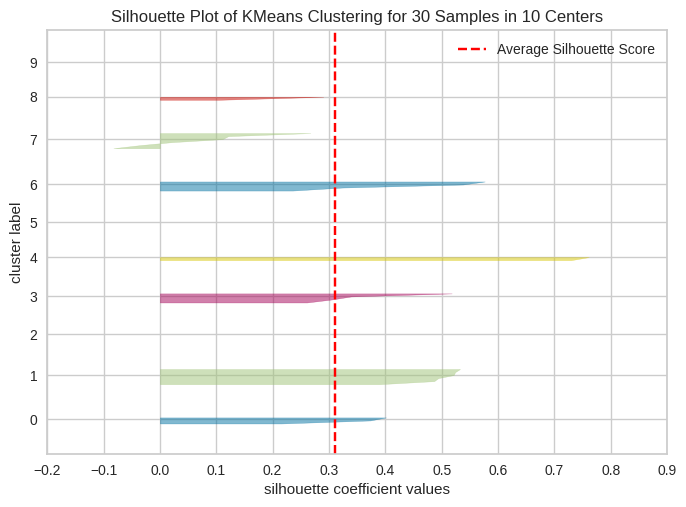

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(10, random_state=42), X, colors='yellowbrick')

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42
}

Text(0.5, 1.0, 'SSE for KMeans cluster range')

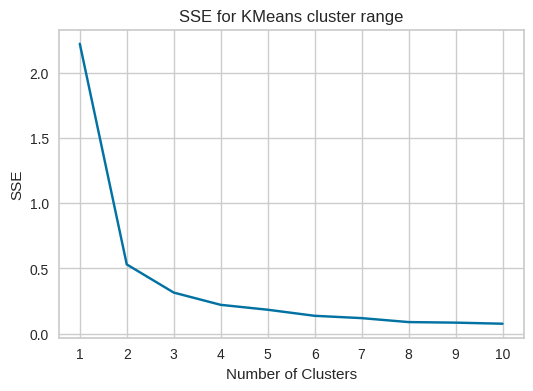

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")



In [ ]:
n = 3

In [ ]:
country_3_clusters = KMeans(n_clusters=n, random_state=42)

In [ ]:
proba_dist['kmeans_3'] = country_3_clusters.fit_predict(X)


In [ ]:
centers = country_3_clusters.cluster_centers_


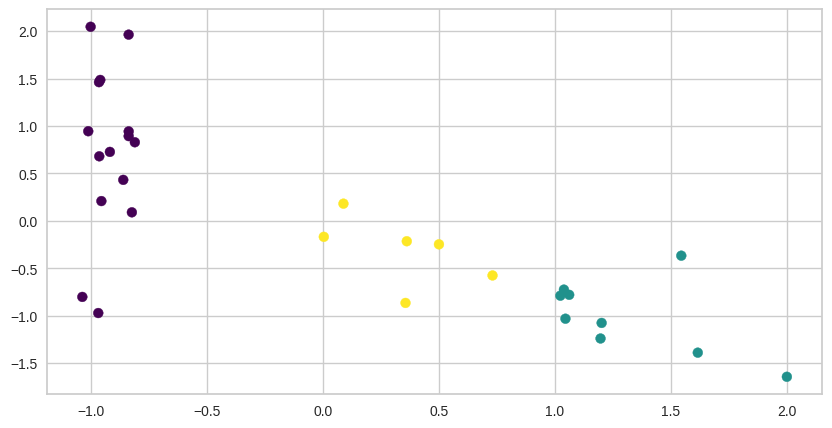

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1],
            c=proba_dist['kmeans_3'], s=50, cmap='viridis')

In [ ]:
proba_dist.groupby('kmeans_3').agg({'country_code':['unique', 'nunique']}).reset_index()

kmeans_3                                       country_code        
                                                       unique nunique
0        0  [ARG, BOL, CHL, COL, CRI, CUB, DOM, ECU, HND, ...      15
1        1      [HTI, IDN, KHM, MYS, NIC, PHL, PRY, SLV, THA]       9
2        2                     [BRA, GTM, LAO, MEX, MMR, URY]       6

In [ ]:
print("# of Countries in cluster distribution")
proba_dist['kmeans_3'].value_counts()

# of Countries in cluster distribution


0    15
1     9
2     6
Name: kmeans_3, dtype: int64

In [ ]:
# mapping dictionary
country_mapping = dict(zip(latest_foreign_aid.country_code, latest_foreign_aid.country_name))

In [ ]:
proba_dist['country_name'] = proba_dist['country_code'].map(country_mapping)

In [ ]:
proba_dist['region'] = np.where(proba_dist.country_name.isin(COUNTRIES[26:-1]), "South East Asia", "Latin America")

In [ ]:
proba_dist.groupby(['kmeans_3', 'country_name']).agg({'country_code':"unique", "region":'unique'}).reset_index()

,kmeans_3,country_name,country_code,region
0,0,Argentina,[ARG],[Latin America]
1,0,Bolivia,[BOL],[Latin America]
2,0,Chile,[CHL],[Latin America]
3,0,Colombia,[COL],[Latin America]
4,0,Costa Rica,[CRI],[Latin America]
5,0,Cuba,[CUB],[Latin America]
6,0,Dominican Republic,[DOM],[Latin America]
7,0,Ecuador,[ECU],[Latin America]
8,0,Honduras,[HND],[Latin America]
9,0,Panama,[PAN],[Latin America]


# Sentence Transformers
## Another approach

In [ ]:
%%capture
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
len(documents)

30

In [ ]:
#Encode all sentences
embeddings = model.encode(documents, normalize_embeddings=True)

In [ ]:
#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

In [ ]:
cos_sim[:3]

tensor([[1.0000, 0.3974, 0.1957, 0.5220, 0.4491, 0.4382, 0.4182, 0.3981, 0.4009,
         0.3787, 0.4395, 0.3774, 0.4359, 0.3767, 0.3981, 0.5128, 0.3921, 0.3981,
         0.4590, 0.3981, 0.3981, 0.3981, 0.5746, 0.3276, 0.4787, 0.3981, 0.2964,
         0.3981, 0.4221, 0.4422],
        [0.3974, 1.0000, 0.2129, 0.4013, 0.3989, 0.3653, 0.4304, 0.3412, 0.3805,
         0.3724, 0.3764, 0.2967, 0.3682, 0.4815, 0.3412, 0.4427, 0.3750, 0.3412,
         0.3800, 0.3412, 0.3412, 0.3412, 0.5816, 0.3522, 0.4119, 0.3412, 0.2998,
         0.3412, 0.4726, 0.3871],
        [0.1957, 0.2129, 1.0000, 0.1353, 0.0688, 0.0535, 0.1443, 0.0305, 0.0899,
         0.1494, 0.0402, 0.0263, 0.0390, 0.1746, 0.0305, 0.0698, 0.2821, 0.0305,
         0.0664, 0.0305, 0.0305, 0.0305, 0.1992, 0.3439, 0.0560, 0.0305, 0.1519,
         0.0305, 0.1808, 0.0615]])

In [ ]:

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append((cos_sim[i][j], i, j))
# all_sentence_combinations

In [ ]:
#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-2 most similar pairs:")
for score, i, j in all_sentence_combinations[0:2]:
    print("{} \t {} \t {:.4f}".format(documents[i], documents[j], cos_sim[i][j]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
embedder = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
corpus_embeddings = embedder.encode(documents)

In [ ]:
len(corpus_embeddings[0])

768

In [ ]:
# Normalize the embeddings to unit length
# corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [ ]:
len(corpus_embeddings)

30

In [ ]:
X = scaler.fit_transform(corpus_embeddings)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42
}

Text(0.5, 1.0, 'SSE for KMeans cluster range')

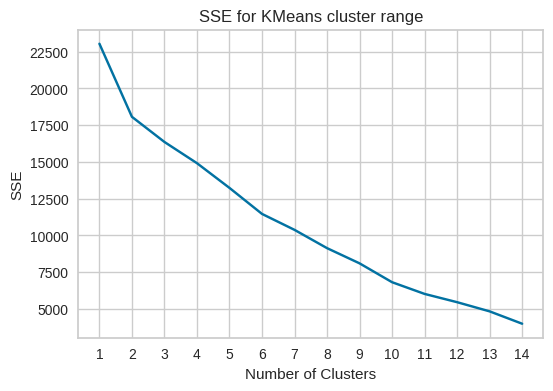

In [ ]:
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans cluster range")



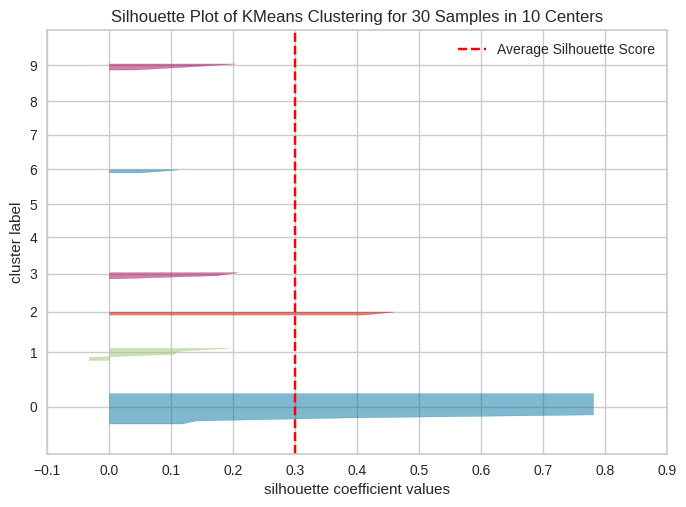

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(10, random_state=42), corpus_embeddings, colors='yellowbrick')

In [ ]:

clustering_model = KMeans(n_clusters=4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

[3 2 0 1 3 0 2 1 3 3 2 1 1 2 1 0 2 1 1 1 1 1 2 0 3 1 2 1 2 1]


In [ ]:
proba_dist['kmeans_word_embdd'] = cluster_assignment

In [ ]:
proba_dist.groupby(['kmeans_word_embdd']).agg({'country_code':"unique", "region":'unique'}).reset_index()

,kmeans_word_embdd,country_code,region
0,0,"[BRA, CRI, MEX, SGP]","[Latin America, South East Asia]"
1,1,"[CHL, DOM, HTI, IDN, LAO, MYS, NIC, PAN, PER, ...","[Latin America, South East Asia]"
2,2,"[BOL, CUB, HND, KHM, MMR, PRY, TLS, VEN]","[Latin America, South East Asia]"
3,3,"[ARG, COL, ECU, GTM, SLV]",[Latin America]


In [ ]:
centers = clustering_model.cluster_centers_


In [ ]:
corpus_embeddings[:,0]

array([-0.02762959,  0.03990283, -0.01398573,  0.03235991,  0.04231422,
       -0.00619074, -0.00540371,  0.01265079, -0.01381961, -0.01211336,
       -0.00269905, -0.00048731,  0.01153248,  0.01535666,  0.01265079,
       -0.03216983,  0.00876008,  0.01265079,  0.02085417,  0.01265079,
        0.01265079,  0.01265079, -0.02055356, -0.02939489,  0.03717126,
        0.01265079,  0.0430441 ,  0.01265079,  0.00422998,  0.01025018],
      dtype=float32)

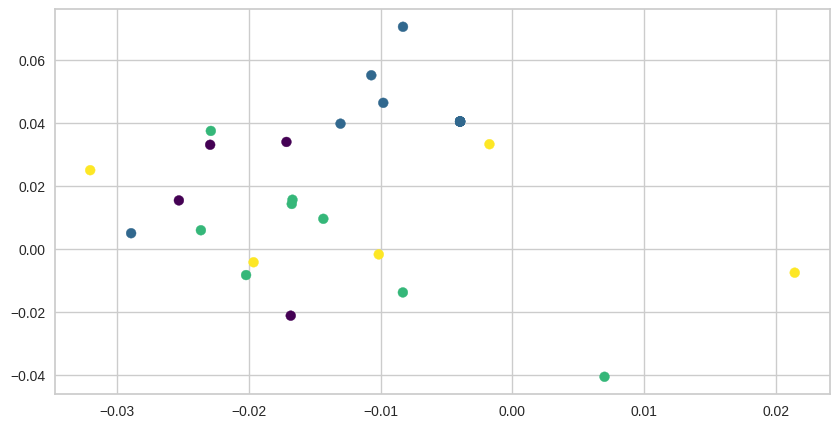

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(corpus_embeddings[:, 2], corpus_embeddings[:, 3],
            c=proba_dist['kmeans_word_embdd'], s=50, cmap='viridis')

## DBSCAN clustering
### clustering using word embeddings (density based clustering)